In [11]:
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [12]:
with open('database/df.pkl', 'rb') as f:
    df = pickle.load(f)

df.head()

,item_nbr,year,month,onpromotion_anytime_in_month,unit_sales,year_month,family,class,perishable
0,103520,2013,1,True,201.0,2013-1,GROCERY I,1028,0
1,103520,2013,2,True,179.0,2013-2,GROCERY I,1028,0
2,103520,2013,3,True,296.0,2013-3,GROCERY I,1028,0
3,103520,2013,4,True,212.0,2013-4,GROCERY I,1028,0
4,103520,2013,5,True,172.0,2013-5,GROCERY I,1028,0


In [13]:
# logic that removes a item_nbr if it doesn't have all the months the other rows have

all_y_months = df['year_month'].unique()

for item_nbr in df['item_nbr'].unique():
    if len(df[df['item_nbr'] == item_nbr]['year_month'].unique()) != len(all_y_months):
        df = df[df['item_nbr'] != item_nbr]

len(df['item_nbr'].unique())

1025

In [14]:
df = df[df['unit_sales'] > 0]

In [15]:
df.rename(columns={'year_month': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

In [16]:
def plot_series(original, trend, seasonal, resid):
    fig, ax = plt.subplots(4, 1, figsize=(15, 10))
    original.plot(ax=ax[0])
    ax[0].set_title('Original')
    trend.plot(ax=ax[1])
    ax[1].set_title('Trend')
    seasonal.plot(ax=ax[2])
    ax[2].set_title('Seasonal')
    resid.plot(ax=ax[3])
    ax[3].set_title('Residual')
    plt.tight_layout()
    
    plt.show()

In [17]:
def decompose_series(series, period=12):
    decomposition = seasonal_decompose(series, period=period)
    plot_series(series, decomposition.trend, decomposition.seasonal, decomposition.resid)
    return decomposition

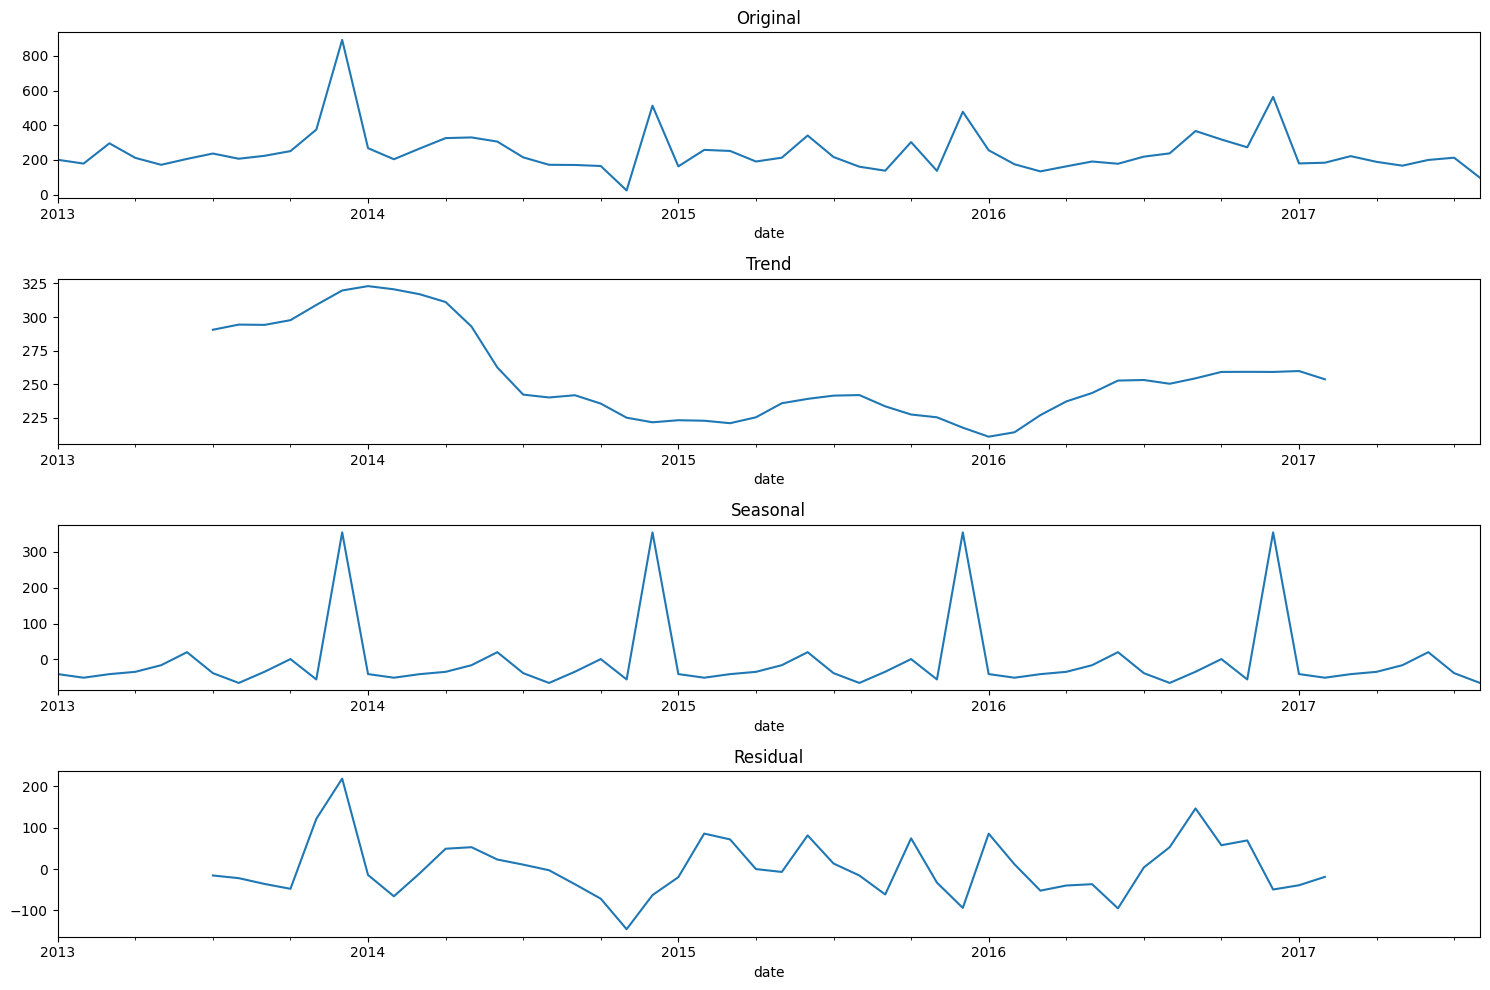

In [18]:
# decompor a série temporal em 3 componentes: tendência, sazonalidade e resíduosfrom statsmodels.tsa.seasonal import seasonal_decompose

item_nbr = 103520

decompose_series(df[df['item_nbr'] == item_nbr]['unit_sales'], period=12)

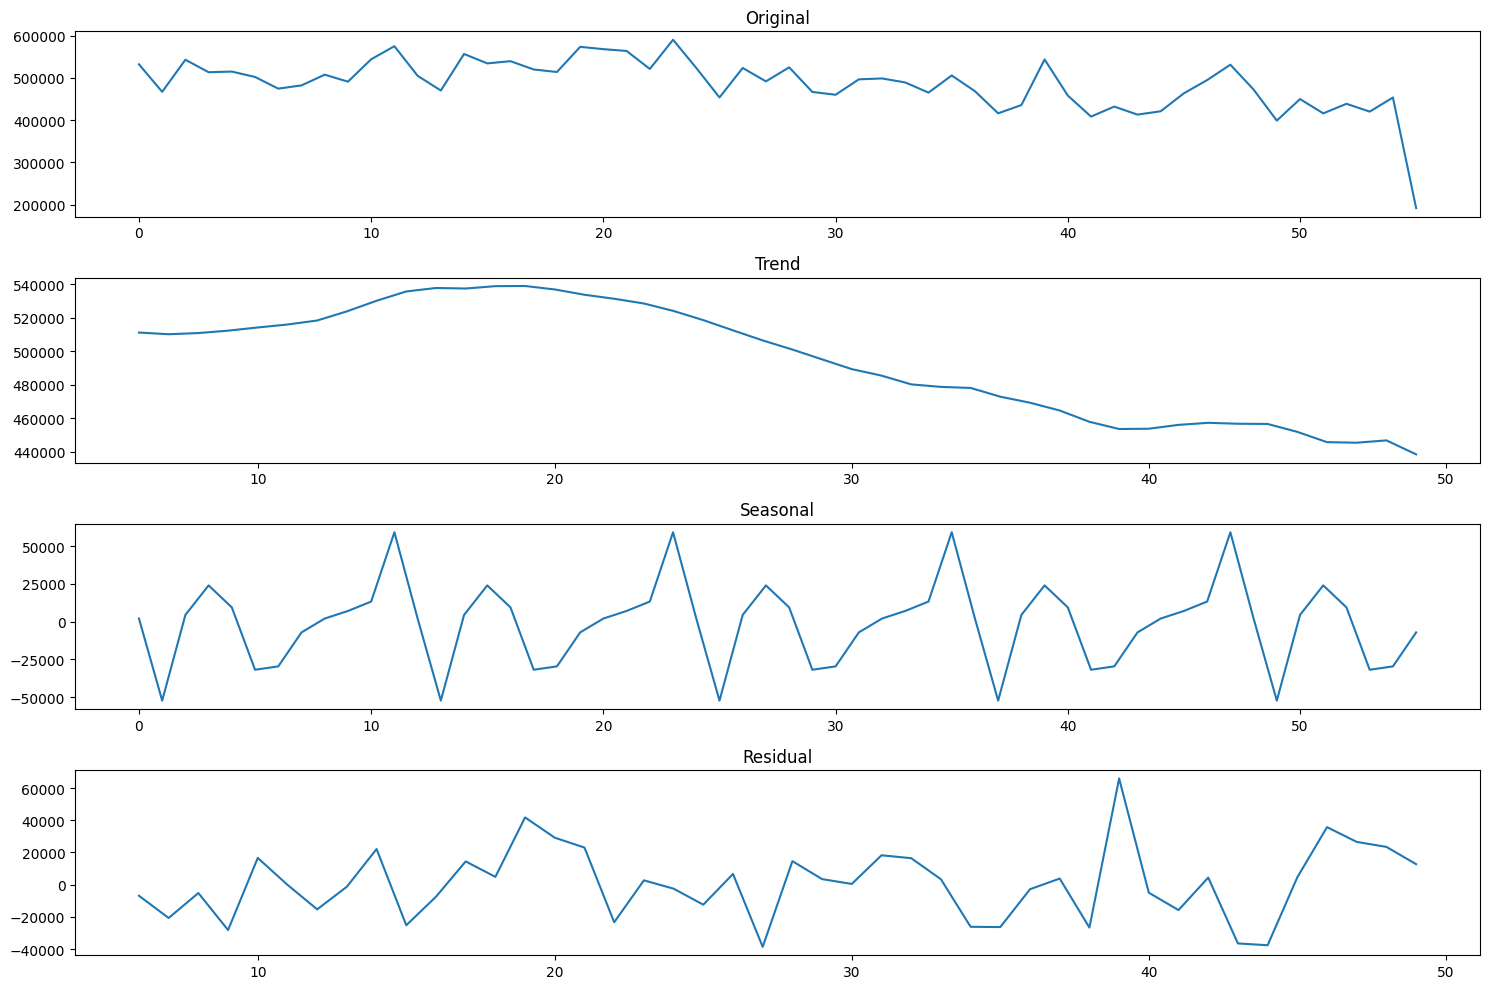

In [19]:
df_agg = df.groupby('date')['unit_sales'].sum().reset_index()

decompose_series(df_agg['unit_sales'], period=12)

In [20]:
# utilizando lazy prediction para escolher um modelo

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

X = df_agg.index
y = df_agg['unit_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'